In [1]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import json

# Load Data

In [2]:
raw = pd.read_pickle(r'Output\combination_results.pkl')
raw['Base_model'] = raw.apply(lambda x: x['Model'].split('_')[0], axis=1)
raw

,Avg-R,Daily-R,Weekly-R,Coverage,Data,Model,Base_model
0,0.626759,0.629353,0.624164,0.940574,Daily,AgglomerativeClustering_100,AgglomerativeClustering
1,0.618368,0.626452,0.610284,0.928279,Weekly,AgglomerativeClustering_100,AgglomerativeClustering
2,0.612406,0.614074,0.610738,0.942623,Monthly,AgglomerativeClustering_100,AgglomerativeClustering
3,0.593114,0.599930,0.586298,0.987552,GICS_Sub,AgglomerativeClustering_100,AgglomerativeClustering
4,0.533164,0.540305,0.526023,0.815353,GICS_Sector,AgglomerativeClustering_100,AgglomerativeClustering
...,...,...,...,...,...,...,...
432,0.467208,0.482679,0.451737,0.997925,Monthly+GICS_Sub,DBSCAN_2,DBSCAN
433,0.476954,0.488858,0.465049,0.784232,Daily+Weekly+GICS_Sub,DBSCAN_2,DBSCAN
434,0.474927,0.483894,0.465959,0.892116,Daily+Monthly+GICS_Sub,DBSCAN_2,DBSCAN
435,0.473792,0.488697,0.458888,0.941909,Weekly+Monthly+GICS_Sub,DBSCAN_2,DBSCAN


# Coverage vs Correlation

In [3]:
data = raw[raw['Data'] == 'Daily']
AgglomerativeClustering = data[data['Base_model'] == 'AgglomerativeClustering'][['Coverage','Avg-R']]
DBSCAN = data[data['Base_model'] == 'DBSCAN'][['Coverage','Avg-R']]
KMeans = data[data['Base_model'] == 'KMeans'][['Coverage','Avg-R']]
AffinityPropagation = data[data['Base_model'] == 'AffinityPropagation'][['Coverage','Avg-R']]

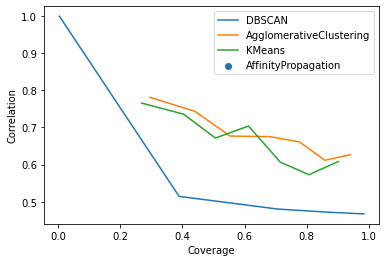

In [4]:
plt.plot(DBSCAN['Coverage'],DBSCAN['Avg-R'])
plt.plot(AgglomerativeClustering['Coverage'],AgglomerativeClustering['Avg-R'])
plt.plot(KMeans['Coverage'],KMeans['Avg-R'])
plt.scatter(AffinityPropagation['Coverage'],AffinityPropagation['Avg-R'])
plt.legend(['DBSCAN','AgglomerativeClustering','KMeans','AffinityPropagation'])
plt.ylabel('Correlation')
plt.xlabel('Coverage')
plt.show()

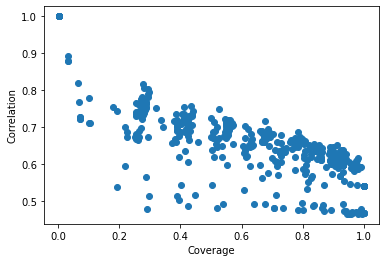

In [5]:
plt.scatter(raw['Coverage'],raw['Avg-R'])
plt.ylabel('Correlation')
plt.xlabel('Coverage')
plt.show()

# Best Correlation Per Data Set

In [6]:
maxs = raw[raw['Coverage'] > .7][['Data','Avg-R']]
maxs = maxs.groupby('Data').agg('max')
bests = pd.merge(raw,maxs,on=['Avg-R','Data'])
bests

,Avg-R,Daily-R,Weekly-R,Coverage,Data,Model,Base_model
0,0.646739,0.652482,0.640995,0.850410,Weekly+Monthly,AgglomerativeClustering_150,AgglomerativeClustering
1,0.661050,0.671108,0.650991,0.776639,Daily,AgglomerativeClustering_200,AgglomerativeClustering
2,0.657899,0.676387,0.639410,0.772541,Weekly,AgglomerativeClustering_200,AgglomerativeClustering
3,0.685675,0.696511,0.674838,0.784836,Monthly,AgglomerativeClustering_200,AgglomerativeClustering
4,0.659723,0.671240,0.648206,0.768443,Daily+Weekly,AgglomerativeClustering_200,AgglomerativeClustering
5,0.661610,0.665395,0.657825,0.768443,Daily+Monthly,AgglomerativeClustering_200,AgglomerativeClustering
6,0.656009,0.666857,0.645162,0.770492,Daily+Weekly+Monthly,AgglomerativeClustering_200,AgglomerativeClustering
7,0.658512,0.675792,0.641232,0.759336,Weekly+GICS_Sector,AgglomerativeClustering_200,AgglomerativeClustering
8,0.646634,0.659702,0.633565,0.784232,Monthly+GICS_Sector,AgglomerativeClustering_200,AgglomerativeClustering
9,0.664149,0.675535,0.652763,0.773859,Daily+Weekly+GICS_Sector,AgglomerativeClustering_200,AgglomerativeClustering


# Notable Combinations

In [7]:
raw[(raw.Coverage > .7) & (raw['Avg-R'] > .9)]

,Avg-R,Daily-R,Weekly-R,Coverage,Data,Model,Base_model


In [8]:
raw[(raw.Coverage > .9) & (raw['Avg-R'] > .85)]

,Avg-R,Daily-R,Weekly-R,Coverage,Data,Model,Base_model


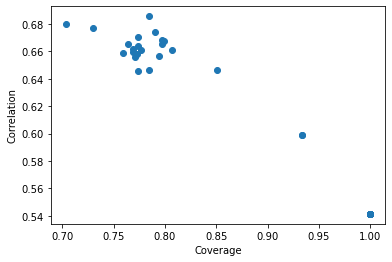

In [14]:
plt.scatter(bests['Coverage'],bests['Avg-R'])

# plt.annotate('Weekly + Monthly + GICS_Sub \n DBSCAN eps=2', (0.86,0.9))
# plt.scatter(0.941909,0.88826)

# plt.annotate('Daily - DBSCAN eps=1.25', (0.7,0.90))
# plt.scatter(0.706967,0.913198)

plt.ylabel('Correlation')
plt.xlabel('Coverage')
plt.show()

# Notable clusters

In [61]:
with open('Output\Correlations\AgglomerativeClustering_250_Monthly+GICS_Sub.json', 'r') as fp:
    correlations = json.load(fp)
with open('Output\Clusters\AgglomerativeClustering_250_Monthly+GICS_Sub.json', 'r') as fp:
    clusters = json.load(fp)
# with open('Output\Correlations\AgglomerativeClustering_100_Daily.json', 'r') as fp:
#     correlations = json.load(fp)
# with open('Output\Clusters\AgglomerativeClustering_100_daily.json', 'r') as fp:
#     clusters = json.load(fp)

In [62]:
len(correlations.keys())

215

In [63]:
corr_df = pd.DataFrame.from_dict(correlations, orient='index')
corr_df = corr_df.reset_index().rename(columns= {'index':'key',0:'Corr'})
corr_df = corr_df[corr_df.Corr > .997]
corr_df

,key,Corr
61,77,0.998374
86,80,0.998374
129,101,0.998888
134,118,0.998888
148,145,0.998374
150,163,0.998374
167,174,0.998888
185,197,0.998374
214,222,0.998888


In [64]:
len(clusters.keys())

250

In [65]:
count = 0
for key in clusters.keys():
    if (len(clusters[key]) > 1):
        count += 1
print(count)

107


In [34]:
clusters

{'0': ['LEG', 'MHK'],
 '1': ['HAL', 'NOV', 'SLB'],
 '2': ['AMP', 'BEN', 'IVZ'],
 '3': ['MPC', 'PSX', 'VLO'],
 '4': ['ABT', 'BAX', 'BDX', 'DHR', 'MDT', 'RMD', 'STE', 'SYK', 'TFX'],
 '5': ['JNJ', 'LLY', 'MRK', 'PFE', 'ZTS'],
 '6': ['AAPL', 'HPE', 'HPQ'],
 '7': ['CBOE', 'CME', 'ICE', 'NDAQ'],
 '8': ['CMI', 'DOV', 'IEX', 'ITW', 'PH', 'PNR', 'SWK', 'XYL'],
 '9': ['ADBE', 'ANSS', 'CDNS', 'ORCL', 'SNPS'],
 '10': ['APTV', 'BWA'],
 '11': ['ACN', 'CTSH', 'IBM'],
 '12': ['ALLE', 'AOS', 'FBHS', 'MAS'],
 '13': ['FLIR', 'KEYS'],
 '14': ['PVH', 'RL'],
 '15': ['CPB', 'GIS', 'HRL', 'K', 'MDLZ', 'SJM'],
 '16': ['IQV', 'MTD', 'TMO'],
 '17': ['ABC', 'CAH', 'MCK'],
 '18': ['CFG',
  'FITB',
  'FRC',
  'HBAN',
  'KEY',
  'MTB',
  'PNC',
  'RF',
  'TFC',
  'ZION'],
 '19': ['HES', 'XOM'],
 '20': ['QRVO', 'SWKS'],
 '21': ['DHI', 'LEN', 'NVR', 'PHM'],
 '22': ['COP', 'EOG', 'FANG', 'PXD'],
 '23': ['KMI', 'WMB'],
 '24': ['AMCR', 'AVY', 'SEE'],
 '25': ['HOLX', 'ZBH'],
 '26': ['AMZN', 'BKNG'],
 '27': ['MET', 'PFG', 